# Gradient Vectors and the Least Squares Problem

In a model with a single explanatory variable, the residual sum of squares (RSS) is given by:

$$RSS = \sum_{i=1}^n (y_i - f(x_i))^2$$

where $y_i$ is the $i^{th}$ value of the variable to be predicted, $x_i$ is the $i^{th}$ value of the explanatory variable, and $f(x_i$) is the predicted value of $y_i$. In a standard linear simple regression model, $y_i = \alpha + \beta{x_i} + \epsilon_i$, where $\alpha$ and $\beta$ are coefficients, $y$ and $x$ are the regressand and the regressor, respectively, and $\epsilon$ is the error term. The sum of squares of residuals is the sum of squares of estimates of $\epsilon_i$; that is

$$RSS = \sum_{i=1}^n (y_i - (\alpha + \beta{x_i}))^2$$

Through algebraic manipulation, this equation can be expressed as:

$$RSS = n\overset{\_\_}{y^2} - 2{\alpha}n{\overset{\_\_}{xy}} - 2{\beta}n{\overset{\_\_}{y}} + {\alpha}^2{n}\overset{\_\_}{x^2} + 2{\alpha}{\beta}n{\overset{\_\_}{x}} + n{\beta}^2$$

where $\overset{\_\_}{y^2}$, ${\overset{\_\_}{xy}}$, ${\overset{\_\_}{y}}$, $\overset{\_\_}{x^2}$, and ${\overset{\_\_}{x}}$ represent the mean of the indicated vectorized operations.

In [36]:
#Imports

%matplotlib inline
from __future__ import division

import random
import math
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid, cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d, Axes3D

The lin_func function generates some data with random error. The magnitude of the error is set by the parameter n:

In [38]:
def lin_func(x, n):
    return 2*x - 10 + n*random.gauss(10, 2)

x = np.arange(0, 10, 0.1)
y = np.array([lin_func(i, 3) for i in x])

Now, calculate the means of the vectorized operations to obtain $\overset{\_\_}{y^2}$, ${\overset{\_\_}{xy}}$, ${\overset{\_\_}{y}}$, $\overset{\_\_}{x^2}$, and ${\overset{\_\_}{x}}$:

In [40]:
y2_mean = sum(np.array([num*num for num in y]))/len(y)
x_y_mean = sum(np.array([i*j for i, j in zip(x, y)]))/len(y)
y_mean = sum(np.array([num for num in y]))/len(y)
x2_mean = sum(np.array([num*num for num in x]))/len(x)
x_mean = sum(np.array([num for num in x]))/len(x)
n = len(x)

Using these parameters, the optimal $\alpha$ and $\beta$ values can be computed and the least squares regression line can be compared to the raw data:

In [23]:
m_solution = ((x_mean*y_mean - x_y_mean)/(x_mean**2 - x2_mean))
b_solution = y_mean - m_solution*x_mean

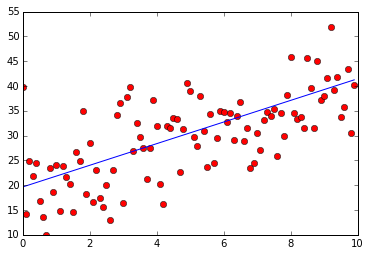

In [41]:
def line_fit(x):
    return m_solution*x + b_solution

y_sol = np.array([line_fit(i) for i in x])
plt.plot(x, y, 'ro')
plt.plot(x, y_sol)
plt.show()

SE_func calculates RSS using the equation above. By plotting 

In [25]:
def SE_func(m,b):
    return (n*y2_mean - 2*m*n*x_y_mean - 2*b*n*y_mean + (m**2)*n*x2_mean + 2*m*b*n*x_mean + n*b**2)

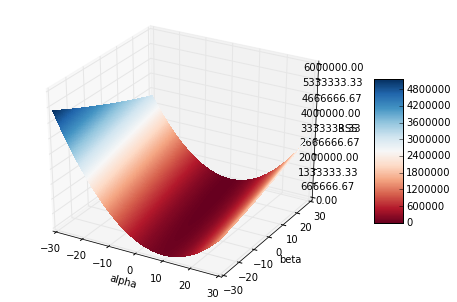

In [49]:
x = np.arange(-30.0, 30.0, 0.1)
y = np.arange(-30.0, 30, 0.1)
X,Y = meshgrid(x, y) # grid of points
Z = SE_func(X, Y) # evaluation of the function on the grid

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('RSS')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [50]:
print m_solution
print b_solution
print SE_func(m_solution, b_solution)

2.18066170443
19.6523520788
4047.4514655
